In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LassoLars, LogisticRegression, Ridge, Lasso, RidgeCV,ElasticNetCV,ElasticNetCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import requests
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

%matplotlib inline

In [116]:
df= pd.read_csv('./Hotel_Reviews.csv')

In [117]:
df.shape

(515738, 17)

In [118]:
df = df.loc[:100_000,:]

In [119]:
df.shape

(100001, 17)

In [120]:
df.isnull().sum()

Hotel_Address                                  0
Additional_Number_of_Scoring                   0
Review_Date                                    0
Average_Score                                  0
Hotel_Name                                     0
Reviewer_Nationality                           0
Negative_Review                                0
Review_Total_Negative_Word_Counts              0
Total_Number_of_Reviews                        0
Positive_Review                                0
Review_Total_Positive_Word_Counts              0
Total_Number_of_Reviews_Reviewer_Has_Given     0
Reviewer_Score                                 0
Tags                                           0
days_since_review                              0
lat                                           37
lng                                           37
dtype: int64

In [121]:
df.columns.values

array(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Tags', 'days_since_review', 'lat', 'lng'], dtype=object)

In [122]:
df.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

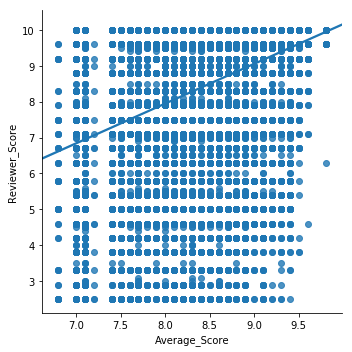

In [123]:
sns.lmplot(x='Average_Score', y='Reviewer_Score', data=df)

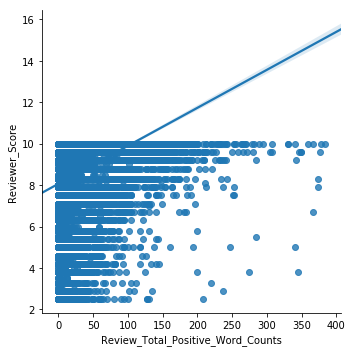

In [124]:
sns.lmplot(x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', data=df)

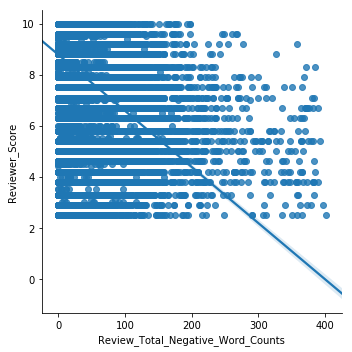

In [125]:
sns.lmplot(x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', data=df)

# Cleaning the data

In [126]:
# drop all restaurnts (rows) with no ratings
# df.dropna(subset=['Rating','Reviews'], inplace = True)

In [127]:
# df = df.reset_index()

In [128]:
# df.drop_duplicates(subset=["Reviews"])

# Dummying the reviewer nationality column

In [129]:
len(set(df['Reviewer_Nationality']))

197

In [130]:
119+17+2000

2136

In [131]:
df = pd.get_dummies(df,
                          columns=['Reviewer_Nationality'],
                          drop_first=False)

In [132]:
len(df.columns)

213

In [133]:
corr = df.corr()

In [134]:
pd.set_option('display.max_columns', 9999)

In [135]:
corr.head(10)

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng,Reviewer_Nationality_,Reviewer_Nationality_ Abkhazia Georgia,Reviewer_Nationality_ Afghanistan,Reviewer_Nationality_ Albania,Reviewer_Nationality_ Algeria,Reviewer_Nationality_ Andorra,Reviewer_Nationality_ Angola,Reviewer_Nationality_ Antarctica,Reviewer_Nationality_ Antigua Barbuda,Reviewer_Nationality_ Argentina,Reviewer_Nationality_ Armenia,Reviewer_Nationality_ Aruba,Reviewer_Nationality_ Australia,Reviewer_Nationality_ Austria,Reviewer_Nationality_ Azerbaijan,Reviewer_Nationality_ Bahamas,Reviewer_Nationality_ Bahrain,Reviewer_Nationality_ Bangladesh,Reviewer_Nationality_ Barbados,Reviewer_Nationality_ Belarus,Reviewer_Nationality_ Belgium,Reviewer_Nationality_ Belize,Reviewer_Nationality_ Benin,Reviewer_Nationality_ Bermuda,Reviewer_Nationality_ Bhutan,Reviewer_Nationality_ Bosnia and Herzegovina,Reviewer_Nationality_ Botswana,Reviewer_Nationality_ Brazil,Reviewer_Nationality_ British Virgin Islands,Reviewer_Nationality_ Brunei,Reviewer_Nationality_ Bulgaria,Reviewer_Nationality_ Burundi,Reviewer_Nationality_ Cambodia,Reviewer_Nationality_ Cameroon,Reviewer_Nationality_ Canada,Reviewer_Nationality_ Cayman Islands,Reviewer_Nationality_ Central Africa Republic,Reviewer_Nationality_ Chile,Reviewer_Nationality_ China,Reviewer_Nationality_ Colombia,Reviewer_Nationality_ Comoros,Reviewer_Nationality_ Costa Rica,Reviewer_Nationality_ Crimea,Reviewer_Nationality_ Croatia,Reviewer_Nationality_ Cura ao,Reviewer_Nationality_ Cyprus,Reviewer_Nationality_ Czech Republic,Reviewer_Nationality_ Democratic Republic of the Congo,Reviewer_Nationality_ Denmark,Reviewer_Nationality_ Dominican Republic,Reviewer_Nationality_ East Timor,Reviewer_Nationality_ Ecuador,Reviewer_Nationality_ Egypt,Reviewer_Nationality_ El Salvador,Reviewer_Nationality_ Equatorial Guinea,Reviewer_Nationality_ Estonia,Reviewer_Nationality_ Ethiopia,Reviewer_Nationality_ Falkland Islands Malvinas,Reviewer_Nationality_ Faroe Islands,Reviewer_Nationality_ Fiji,Reviewer_Nationality_ Finland,Reviewer_Nationality_ France,Reviewer_Nationality_ French Guiana,Reviewer_Nationality_ Gabon,Reviewer_Nationality_ Gambia,Reviewer_Nationality_ Georgia,Reviewer_Nationality_ Germany,Reviewer_Nationality_ Ghana,Reviewer_Nationality_ Gibraltar,Reviewer_Nationality_ Greece,Reviewer_Nationality_ Guadeloupe,Reviewer_Nationality_ Guam,Reviewer_Nationality_ Guatemala,Reviewer_Nationality_ Guernsey,Reviewer_Nationality_ Guyana,Reviewer_Nationality_ Haiti,Reviewer_Nationality_ Honduras,Reviewer_Nationality_ Hong Kong,Reviewer_Nationality_ Hungary,Reviewer_Nationality_ Iceland,Reviewer_Nationality_ India,Reviewer_Nationality_ Indonesia,Reviewer_Nationality_ Iran,Reviewer_Nationality_ Iraq,Reviewer_Nationality_ Ireland,Reviewer_Nationality_ Isle of Man,Reviewer_Nationality_ Israel,Reviewer_Nationality_ Italy,Reviewer_Nationality_ Ivory Coast,Reviewer_Nationality_ Jamaica,Reviewer_Nationality_ Japan,Reviewer_Nationality_ Jersey,Reviewer_Nationality_ Jordan,Reviewer_Nationality_ Kazakhstan,Reviewer_Nationality_ Kenya,Reviewer_Nationality_ Kosovo,Reviewer_Nationality_ Kuwait,Reviewer_Nationality_ Kyrgyzstan,Reviewer_Nationality_ Laos,Reviewer_Nationality_ Latvia,Reviewer_Nationality_ Lebanon,Reviewer_Nationality_ Liberia,Reviewer_Nationality_ Libya,Reviewer_Nationality_ Liechtenstein,Reviewer_Nationality_ Lithuania,Reviewer_Nationality_ Luxembourg,Reviewer_Nationality_ Macau,Reviewer_Nationality_ Macedonia,Reviewer_Nationality_ Madagascar,Reviewer_Nationality_ Malawi,Reviewer_Nationality_ Malaysia,Reviewer_Nationality_ Maldives,Reviewer_Nationality_ Mali,Reviewer_Nationality_ Malta,Reviewer_Nationality_ Martinique,Reviewer_Nationality_ Mauritania,Reviewer_Nationality_ Mauritius,Reviewer_Nationality_ Mexico,Reviewer_Nationality_ Moldova,Reviewer_Nationality_ Monaco,Reviewer_Nationality_ Mongolia,Revi

# Scikit-Learn TfidfVectorizer

In [136]:
from sklearn.feature_extraction import stop_words

In [137]:
# Instantiate a CountVectorizer with (stop words, max features, N-grams)
tvec_neg = TfidfVectorizer(max_features=1000,stop_words=None,ngram_range=(1,2))
tvec_pos = TfidfVectorizer(max_features=1000,stop_words=None,ngram_range=(1,2))

In [138]:
# Fit the vectorizer on our corpus
tvec_neg.fit(df['Negative_Review'])
tvec_pos.fit(df['Positive_Review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [139]:
# Transform the corpus.
neg_reviews = tvec_neg.transform(df['Negative_Review'])
pos_reviews = tvec_pos.transform(df['Positive_Review'])

In [140]:
type(neg_reviews)

scipy.sparse.csr.csr_matrix

In [141]:
# Convert the negative comments vectors (columns) into a DataFrame.

neg_reviews_df  = pd.DataFrame(neg_reviews.toarray(),
                          columns=tvec_neg.get_feature_names())
neg_reviews_df

00   10  100        11   12   15   20  20 minutes   24   25  \
0       0.04266  0.0  0.0  0.089673  0.0  0.0  0.0         0.0  0.0  0.0   
1       0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
2       0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
3       0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
4       0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
...         ...  ...  ...       ...  ...  ...  ...         ...  ...  ...   
99996   0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
99997   0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
99998   0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
99999   0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   
100000  0.00000  0.0  0.0  0.000000  0.0  0.0  0.0         0.0  0.0  0.0   

             2nd   30   40   45   50      able  able to     about  about it  \
0       0.047495  0.0  0.0  0.0  0.0  0.040031  0.04018  0.000000       0.0   
1       0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
2       0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
3       0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.047734       0.0   
4       0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
...          ...  ...  ...  ...  ...       ...      ...       ...       ...   
99996   0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
99997   0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
99998   0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
99999   0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   
100000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.00000  0.000000       0.0   

        about the  about this  above  absolutely   ac  acceptable  access  \
0             0.0         0.0    0.0         0.0  0.0         0.0     0.0   
1             0.0         0.0    0.0         0.0  0.0         0.0     0.0   
2             0.0         0.0    0.0         0.0  0.0         0.0     0.0   
3             0.0         0.0    0.0         0.0  0.0         0.0     0.0   
4             0.0         0.0    0.0         0.0  0.0         0.0     0.0   
...           ...         ...    ...         ...  ...         ...     ...   
99996         0.0         0.0    0.0         0.0  0.0         0.0     0.0   
99997         0.0         0.0    0.0         0.0  0.0         0.0     0.0   
99998         0.0         0.0    0.0         0.0  0.0         0.0     0.0   
99999         0.0         0.0    0.0         0.0  0.0         0.0     0.0   
100000        0.0         0.0    0.0         0.0  0.0         0.0     0.0   

        access to  account  across  across the  actually  added  additional  \
0             0.0      0.0     0.0         0.0       0.0    0.0         0.0   
1             0.0      0.0     0.0         0.0       0.0    0.0         0.0   
2             0.0      0.0     0.0         0.0       0.0    0.0         0.0   
3             0.0      0.0     0.0         0.0       0.0    0.0         0.0   
4             0.0      0.0     0.0         0.0       0.0    0.0         0.0   
...           ...      ...     ...         ...       ...    ...         ...   
99996         0.0      0.0     0.0         0.0       0.0    0.0         0.0   
99997         0.0      0.0     0.0         0.0       0.0    0.0         0.0   
99998         0.0      0.0     0.0         0.0       0.0    0.0         0.0   
99999         0.0      0.0     0.0         0.0       0.0    0.0         0.0   
100000        0.0      0.0     0.0         0.0       0.0    0.0         0.0   

        adequate  advance  advertised  advised     after  after the  \
0            0.0      0.0         0.0      0.0  0.031125        0.0   
1            0.0      0.0         0.0      0.0  0.000000        0.0   
2            0.0      0.0         0.0      0.0  0.000000        

In [142]:
# Convert the positive comments vectors (columns) into a DataFrame.

pos_reviews_df  = pd.DataFrame(pos_reviews.toarray(),
                          columns=tvec_neg.get_feature_names())
pos_reviews_df

00   10  100   11   12   15   20  20 minutes   24   25  2nd   30  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...         ...  ...  ...  ...  ...   
99996   0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
99997   0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
99998   0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
99999   0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   
100000  0.0  0.0  0.0  0.0  0.0  0.0  0.0         0.0  0.0  0.0  0.0  0.0   

         40   45   50  able  able to  about  about it  about the  about this  \
0       0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
1       0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
2       0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
3       0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
4       0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
...     ...  ...  ...   ...      ...    ...       ...        ...         ...   
99996   0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
99997   0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
99998   0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
99999   0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   
100000  0.0  0.0  0.0   0.0      0.0    0.0       0.0        0.0         0.0   

        above  absolutely   ac  acceptable  access  access to  account  \
0         0.0         0.0  0.0         0.0     0.0        0.0      0.0   
1         0.0         0.0  0.0         0.0     0.0        0.0      0.0   
2         0.0         0.0  0.0         0.0     0.0        0.0      0.0   
3         0.0         0.0  0.0         0.0     0.0        0.0      0.0   
4         0.0         0.0  0.0         0.0     0.0        0.0      0.0   
...       ...         ...  ...         ...     ...        ...      ...   
99996     0.0         0.0  0.0         0.0     0.0        0.0      0.0   
99997     0.0         0.0  0.0         0.0     0.0        0.0      0.0   
99998     0.0         0.0  0.0         0.0     0.0        0.0      0.0   
99999     0.0         0.0  0.0         0.0     0.0        0.0      0.0   
100000    0.0         0.0  0.0         0.0     0.0        0.0      0.0   

        across  across the  actually  added  additional  adequate  advance  \
0          0.0         0.0       0.0    0.0         0.0       0.0      0.0   
1          0.0         0.0       0.0    0.0         0.0       0.0      0.0   
2          0.0         0.0       0.0    0.0         0.0       0.0      0.0   
3          0.0         0.0       0.0    0.0         0.0       0.0      0.0   
4          0.0         0.0       0.0    0.0         0.0       0.0      0.0   
...        ...         ...       ...    ...         ...       ...      ...   
99996      0.0         0.0       0.0    0.0         0.0       0.0      0.0   
99997      0.0         0.0       0.0    0.0         0.0       0.0      0.0   
99998      0.0         0.0       0.0    0.0         0.0       0.0      0.0   
99999      0.0         0.0       0.0    0.0         0.0       0.0      0.0   
100000     0.0         0.0       0.0    0.0         0.0       0.0      0.0   

        advertised  advised  after  after the  afternoon  again  against  air  \
0              0.0      0.0    0.0        0.0        0.0    0.0      0.0  0.0   
1              0.0      0.0    0.0        0.0        0.0    0.0      0.0  0.0   
2              0.0      0.0    0.0        0.0        0

In [143]:
pos_reviews_df.shape,neg_reviews_df.shape

((100001, 2000), (100001, 2000))

In [144]:
import sys 

In [145]:
sys.getsizeof(neg_reviews_df)/1e6

1600.016152

(array([22882., 13980., 11232.,  8661.,  7753., 13094.,  8563.,  5529.,
         6132.,  2175.]),
 array([0.        , 0.21400662, 0.42801323, 0.64201985, 0.85602647,
        1.07003308, 1.2840397 , 1.49804631, 1.71205293, 1.92605955,
        2.14006616]),
 <a list of 10 Patch objects>)

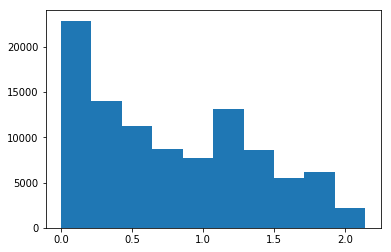

In [146]:
plt.hist(df['Reviewer_Score'].map(lambda x : np.log(11-x)))

(array([  778.,  1381.,  2380.,  3768.,  2518.,  6676., 11640., 14030.,
        19957., 36873.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <a list of 10 Patch objects>)

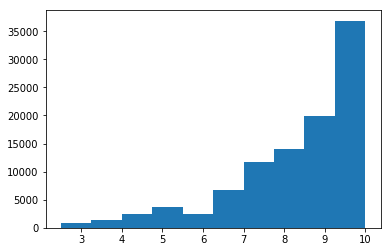

In [147]:
plt.hist(df['Reviewer_Score'])

In [148]:
rev_score = df.Reviewer_Score.unique()

In [149]:
df['Reviewer_Score'].sort_values().unique()

array([ 2.5,  2.9,  3. ,  3.1,  3.3,  3.5,  3.8,  4. ,  4.2,  4.4,  4.5,
        4.6,  5. ,  5.4,  5.5,  5.6,  5.8,  6. ,  6.3,  6.5,  6.7,  6.9,
        7. ,  7.1,  7.5,  7.9,  8. ,  8.1,  8.3,  8.5,  8.8,  9. ,  9.2,
        9.4,  9.5,  9.6, 10. ])

# Merging pos and neg reviews with the main Dataframe



In [150]:
df = pd.concat([df, neg_reviews_df, pos_reviews_df ], axis=1)

In [151]:
df.shape

(100001, 4213)

In [152]:
df.columns[:20]

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania '],
      dtype='object')

# Creating X and y

In [153]:
drop_list = ['Hotel_Address', 
            'Review_Date',
            'Hotel_Name',
            'days_since_review',
            'lat',
            'lng',
             'Tags',
            'Reviewer_Score',
            'Negative_Review',
            'Positive_Review'

            ]
X = df.drop( drop_list, axis=1)
y = df['Reviewer_Score']

In [154]:
X.columns

Index(['Additional_Number_of_Scoring', 'Average_Score',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Nationality_ ',
       'Reviewer_Nationality_ Abkhazia Georgia ',
       'Reviewer_Nationality_ Afghanistan ', 'Reviewer_Nationality_ Albania ',
       ...
       'you get', 'you had', 'you have', 'you need', 'you re', 'you want',
       'you would', 'young', 'your', 'your room'],
      dtype='object', length=4203)

In [155]:
X.shape

(100001, 4203)

In [156]:
y.shape

(100001,)

# Spliting the train and test datasets

In [157]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                             y,
                                                             test_size=0.25,
                                                             random_state=42)

In [158]:
X_train.shape

(75000, 4203)

In [159]:
X_test.shape

(25001, 4203)

In [160]:
y_train.shape

(75000,)

In [161]:
y_test.shape

(25001,)

# Scaling the data

In [162]:
# Instantiate Standard Scaler
ss = StandardScaler()

In [163]:
X_train_scaled = ss.fit_transform(X_train)

In [164]:
X_test_scaled = ss.transform(X_test)

# Performing logistic regression (Regularized by default)

The y variable here must be a category so we round our y variable (reviews) so it is integers which we can use in the modeling.

In [165]:
# Rounding up the ratings to floats with zero decimals

y_train = np.round(y_train, decimals=0)
y_test = np.round(y_test, decimals=0)

In [166]:
# Changing the ratings from float to integer. 
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [167]:
# Instantiate logistic regression model without regularization.
logreg = LogisticRegression()

In [168]:
# Fit logreg model.
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
# Generate predictions for test data from logistic regression model.
y_preds_test = logreg.predict(X_test)

In [170]:
# Calculating Accuracy using the train data
y_preds_train = logreg.predict(X_train)
logreg1 = logreg.score(X_train, y_train)
# Let's estimate our accuracy on the "new" test data
logreg2 = logreg.score(X_test, y_test)
print(f'Logistic Regression Accuracy Score on train/test data: {round(logreg1, 3),round(logreg2, 3)}')

Logistic Regression Accuracy Score on train/test data: (0.477, 0.46)


# Multinomial Naive Bayes

We fit multinomial Naive Bayes because count vectorizer gives us an integer count of words 
in a document.

In [171]:
mnb = MultinomialNB()

mnb.fit(X_train, y_train)
mnb1=mnb.score(X_train, y_train)
mnb2=mnb.score(X_test, y_test)
print(f'Accuracy Score on train/test data: {round(mnb1, 3),round(mnb2, 3)}')

Accuracy Score on train/test data: (0.38, 0.375)


# Gaussian Naive Bayes

In [172]:
# We fit Gaussian Naive Bayes because TF-IDF brings back a float rather than integer 
# counts or just zeros and ones (thereby precluding use of Multinomial or Bernoulli 
# Naive Bayes.)

In [173]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
gnb1=gnb.score(X_train, y_train)
gnb2=gnb.score(X_test, y_test)
print(f'Accuracy Score on train/test data: {round(gnb1, 3),round(gnb2, 3)}')

Accuracy Score on train/test data: (0.286, 0.275)


# Predicted vs. actual reviews 

In [174]:
plt.scatter(y_test,enet_model_preds)
plt.plot(range(10))
plt.ylabel('Predicted Score', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)

NameError: name 'enet_model_preds' is not defined

In [ ]:
abs_error = abs(y_test - enet_model_preds)
abs_error.sort_values()

In [ ]:
max(abs_error)

In [ ]:
df['Negative_Review'][96642]

In [ ]:
df['Positive_Review'][96642]

In [ ]:
df['Reviewer_Score'][96642]

In [ ]:
enet_model_preds_train[96642]

In [ ]:
enet_model_preds_train.shape

In [ ]:
enet_model_preds.shape

# Predicted reviews vs. Residuals

In [ ]:
resid = y_preds_train - y_train

In [ ]:
plt.scatter(y_train, resid)
plt.ylabel('Residuals', fontsize=20)
plt.xlabel('Actual Score', fontsize=20)